# Cleaning and Preprocessing Data for Machine Learning

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

brain = pd.read_csv('../Data/ttc_subway_delay_2018_2019_for_machine_learning.csv')
brain.head()

,id,date,time,day,station,code,min_delay,min_gap,bound,line,vehicle,code_info,latitude,longitude,line_name,month,time_range,month_number,hour,year
0,1,2019-01-01,3:03,Tuesday,DUPONT STATION,MUATC,11,16,N,YU,6061,ATC Project,43.674584,-79.406830,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
1,2,2019-01-01,3:08,Tuesday,EGLINTON WEST STATION,EUATC,11,16,S,YU,5656,ATC RC&S Equipment,43.699209,-79.435819,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
2,3,2019-01-01,3:09,Tuesday,DUPONT STATION,EUATC,6,11,N,YU,5381,ATC RC&S Equipment,43.674584,-79.406830,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
3,4,2019-01-01,3:26,Tuesday,ST CLAIR WEST STATION,EUATC,4,9,N,YU,5571,ATC RC&S Equipment,43.683888,-79.415113,Yonge University Spadina,January,9PM-1:30AM,1,3,2019
4,5,2019-01-01,8:04,Tuesday,DAVISVILLE STATION,MUNOA,5,10,S,YU,0,No Operator Immediately Available - Not E.S.A....,43.697778,-79.397222,Yonge University Spadina,January,5-9AM,1,8,2019


In [3]:
X = brain[["time", "station", "min_gap"]]
y = brain["min_delay"].values.reshape(-1, 1)
print(X.shape, y.shape)

(13513, 3) (13513, 1)


## Dummy Encoding (Binary Encoded Data)

In [4]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["time", "station"])
data_binary_encoded.head()

,min_gap,time_0:00,time_0:01,time_0:02,time_0:03,time_0:04,time_0:05,time_0:06,time_0:07,time_0:08,...,station_VICTORIA PARK STATION,station_WARDEN STATION,station_WELLESLEY STATION,station_WILSON STATION,station_WOODBINE STATION,station_YONGE BLOOR BD STATION,station_YONGE BLOOR YUS STATION,station_YORK MILLS STATION,station_YORK UNIVERSITY STATION,station_YORKDALE STATION
0,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head()

,min_gap,time_0:00,time_0:01,time_0:02,time_0:03,time_0:04,time_0:05,time_0:06,time_0:07,time_0:08,...,station_VICTORIA PARK STATION,station_WARDEN STATION,station_WELLESLEY STATION,station_WILSON STATION,station_WOODBINE STATION,station_YONGE BLOOR BD STATION,station_YONGE BLOOR YUS STATION,station_YORK MILLS STATION,station_YORK UNIVERSITY STATION,station_YORKDALE STATION
0,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Scaling and Normalization

In [6]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,min_gap,time_0:00,time_0:01,time_0:02,time_0:03,time_0:04,time_0:05,time_0:06,time_0:07,time_0:08,...,station_VICTORIA PARK STATION,station_WARDEN STATION,station_WELLESLEY STATION,station_WILSON STATION,station_WOODBINE STATION,station_YONGE BLOOR BD STATION,station_YONGE BLOOR YUS STATION,station_YORK MILLS STATION,station_YORK UNIVERSITY STATION,station_YORKDALE STATION
576,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3526,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5144,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2973,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11159,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [8]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [9]:
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["code"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["code"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [10]:
# plt.show()

## Putting it all together

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [11]:
X = pd.get_dummies(brain[["time", "station", "min_gap"]])
y = brain["min_delay"].values.reshape(-1, 1)
X.head()

,min_gap,time_0:00,time_0:01,time_0:02,time_0:03,time_0:04,time_0:05,time_0:06,time_0:07,time_0:08,...,station_VICTORIA PARK STATION,station_WARDEN STATION,station_WELLESLEY STATION,station_WILSON STATION,station_WOODBINE STATION,station_YONGE BLOOR BD STATION,station_YONGE BLOOR YUS STATION,station_YORK MILLS STATION,station_YORK UNIVERSITY STATION,station_YORKDALE STATION
0,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Step 2) Split data into training and testing data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

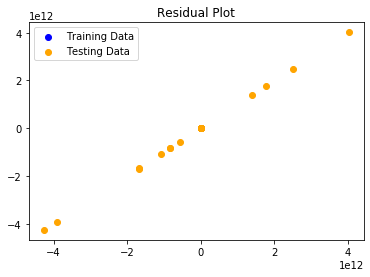

In [14]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Step 5) Quantify your model using the scaled data

k: 1, Train/Test Score: 0.992/0.265
k: 3, Train/Test Score: 0.514/0.302
k: 5, Train/Test Score: 0.461/0.297
k: 7, Train/Test Score: 0.433/0.311
k: 9, Train/Test Score: 0.418/0.311
k: 11, Train/Test Score: 0.410/0.316
k: 13, Train/Test Score: 0.406/0.311
k: 15, Train/Test Score: 0.403/0.313
k: 17, Train/Test Score: 0.404/0.316
k: 19, Train/Test Score: 0.400/0.318


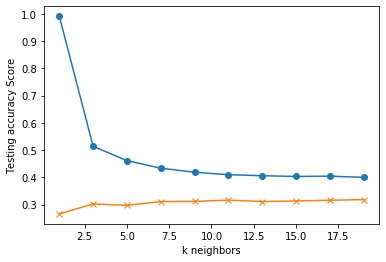

In [15]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.311


In [17]:
# new_iris_data = [[4.3, 3.2, 1.3, 0.2]]
# predicted_class = knn.predict(new_iris_data)
# print(predicted_class)